# Modelos de Regresion Lineal
## Modelos con datos simulados

* Y = a+b * x
* X : 100 valores distribuidos segun N (1.5,2.5)
* Ye = 9 + 1.1 * X + e
* e : estara distribuiido segun una N(0,0.8)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

In [3]:
x = 1.5 + 2.5 * np.random.randn(100)

In [4]:
res = 0 + 0.8 * np.random.randn(100)

In [5]:
y_pred = 9 + 1.1 * x

In [6]:
y_act = 9 + 1.1 * x + res

In [7]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [8]:
data = pd.DataFrame({
    "x": x_list,
    "y_actual" : y_act_list,
    "y_prediccion" : y_pred_list
})

In [9]:
data.head()

,x,y_actual,y_prediccion
0,3.916853,13.856650,13.308538
1,3.724946,13.201305,13.097440
2,0.706941,10.527813,9.777635
3,3.155593,13.155133,12.471153
4,2.297542,10.621117,11.527296


In [10]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]

Text(0.5,1,'Valor actual vs Prediccion')

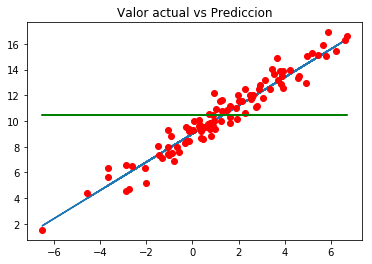

In [11]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean,"g")
plt.title("Valor actual vs Prediccion")

## ¿Como es la prediccion de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de expplicar(Errore que deberian seguir una distribucion normal)
* SSR : Diferencia entre la regresion y el valor medio ue el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinacion entre 0 y 1

In [12]:
y_m = np.mean(y_act)
data['SSR'] = (data['y_prediccion']-np.mean(y_act))**2
data['SSD'] = (data['y_prediccion']-data['y_actual'])**2
data['SST'] = (data['y_actual']-np.mean(y_act))**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,3.916853,13.856650,13.308538,7.973676,0.300427,11.369585
1,3.724946,13.201305,13.097440,6.826054,0.010788,7.379569
2,0.706941,10.527813,9.777635,0.500037,0.562767,0.001853
3,3.155593,13.155133,12.471153,3.945723,0.467828,7.130844
4,2.297542,10.621117,11.527296,1.086863,0.821160,0.018591


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
print(SSR)
print(SSD)
print(SST)
print((SSR+SSD))

779.063557892602
53.282573612942365
863.4514277697855
832.3461315055443


In [16]:
R2 = SSR/SST

In [17]:
R2

0.9022668013936239

(array([ 2.,  2.,  4., 15., 18., 20., 18.,  9.,  9.,  3.]),
 array([-2.14963483, -1.77040286, -1.39117088, -1.01193891, -0.63270694,
        -0.25347497,  0.125757  ,  0.50498897,  0.88422095,  1.26345292,
         1.64268489]),
 <a list of 10 Patch objects>)

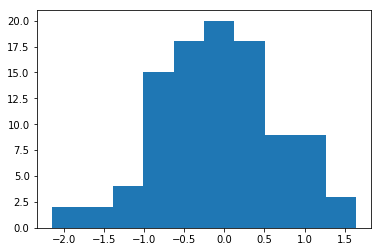

In [18]:
plt.hist(data['y_prediccion']-data['y_actual'])

(array([66., 16.,  8.,  3.,  5.,  1.,  0.,  0.,  0.,  1.]),
 array([3.72736696e-04, 8.04481633e+00, 1.60892599e+01, 2.41337035e+01,
        3.21781471e+01, 4.02225907e+01, 4.82670343e+01, 5.63114779e+01,
        6.43559215e+01, 7.24003651e+01, 8.04448087e+01]),
 <a list of 10 Patch objects>)

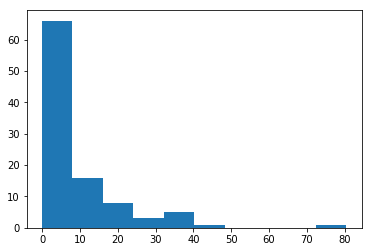

In [19]:
plt.hist(data['SST'])

## Obteniendo la recta de la regresion
* y = a + b *x
* b = sum((x1-x_m) * (y_i-y_m)) / sum((xi - x_m)^2)
* a = y_m - b * x_m

In [20]:
x_m = np.mean(data['x'])
y_m = np.mean(data["y_actual"])
x_m, y_m

(1.2903350721076094, 10.484768429868238)

In [21]:
data['beta_n'] = (data["x"]-x_m)*(data["y_actual"]-y_m)
data['beta_d'] = (data["x"]-x_m)**2

In [22]:
beta = sum(data['beta_n'])/sum(data['beta_d'])

In [23]:
alpha = y_m - beta * x_m

In [24]:
alpha, beta

(9.036269385853391, 1.122575891585195)

### El modelo lineal obtenido por regresion es 
y = 9.183952202255277 + 1.0957889330692185 * x

In [25]:
data['y_model'] = alpha + beta * data["x"]

In [26]:
SSR = sum((data['y_model']-y_m)**2)
SSD = sum((data['y_model']-data['y_actual'])**2)
SST = sum((data['y_actual']-y_m)**2)

In [27]:
SSR, SSD, SST

(810.9245417693157, 52.52688600046861, 863.4514277697855)

In [28]:
R2 = SSR / SST
R2

0.9391663684706136

Text(0.5,1,'Valor actual vs Prediccion')

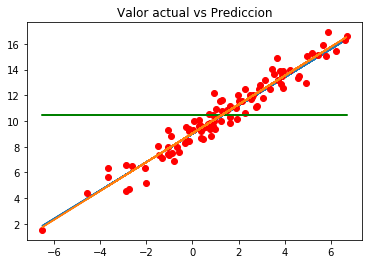

In [29]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean,"g")
plt.plot(x,data['y_model'])
plt.title("Valor actual vs Prediccion")

### Error estandar de los residuos (RSE)

In [30]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7321124453646741

In [31]:
y_m

10.484768429868238

In [34]:
RSE/y_m

0.06982628660439329